# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

We start by importing packages and set magics that we will be needing for our project: 

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject
from modelproject import ramsey_model_simulation

# Model description: The Ramsey model

Ramsey's model consists of households and firms where households maximize total present-day utility and firms maximize profits. In Ramsey's model, homes live forever, and this is complete foresight. The Ramsey model is often linked to the Solow model, but is simpler in the sense that it does not have to solve as many equations as is customary in Solow. We solve the Ramsey model by performing utility maximization, and for this we need to have the households' utility functions and their income bands, which we use to find the first-order condition. The utility function explains the aggregate utility of the household, while the income curve explains how capital stock changes between periods. We then set up a Lagrange function and end up with two differential equations – one for consumption (the Euler equation) and the other for the capital stock – that describe equilibrium.

The general equilibrium of households and firms with a public sector where consumption is financed by tax revenue, G=T are those c(t) and k(t) that satisfy the following conditions in general:
$$\dot{c(t)} = \frac{f'(k(t))-\rho-\theta g}{\theta} c(t)$$
$$ \dot{k(t)}=f(k(t))-c(t)-G(t)-(n+g)k(t) $$
$$ \lim_{t \rightarrow \infty} e^{-R(t)}e^{(n+g)t}k_t=0 $$
$$ k(0)=k_0$$

where
$$ R_t = \int\limits_{\tau=0}^t f'(k(\tau)) d\tau $$



We assume that the production function takes on the form of a cobb-douglas
$$Y(t) = K(t)^{\alpha} A(t)L(t)^{1-\alpha}$$
We get the the production per unit:
$$ y(t) =  k(t)^\alpha$$
by defining capital per capita: 
$$k= (K/AL)^\alpha$$
and for the general equilibrium we need to know that: 
$$f'(k(t))= \alpha k^{(\alpha -1)}$$ 

we also know from first order condition that:
$r= \alpha k(t)^{\alpha -1}$,
$w= (1 - \alpha) k^\alpha$ and 
$y= k^\alpha$  

In a long term equilibrium we know that G(t) = G and our capital stock on each capita can be written as:
$$\dot{c(t)} = 0 $$
$$ k^* = (\frac{\alpha}{(\rho + \theta g)})^{(\frac{1}{(1-\alpha)})}$$

given the information above. 
Furthermore, we find that consumption for each capita is: 
$$\dot{k(t)} = 0$$
$$c^* = k^{* \alpha} - G - (n+g)k^*$$


We define our parameters as can be seen in the modelproject.py file. 
We know that $\rho$, the present value annual ratio for households is 10\% , which states that households would rather consume today rather than in the future. Furthermore, we can assume that as $\theta$ is 4/3 that households would prefer to have their consumption rather stable. $\alpha$ = 30\% tells us that the economic cycle is not in bloom and the efficiency of the labour force increases in harmony with increased technology and knowledge among the workforce. We also see that population growth is 2\%, which could apply to countries in Scandinavia for example. 

## Numerical and analytical solution

Now lets look at our economy and analyze the effects on many key variables. We assume that the economy is in a long term equilibrium and that there is none public consumption. We want to see the effects of increasing the public consumption that amounts to 50\% of the GDP in a given economy. First, let see the effects if the shock happens at the first period and secondly lets also see the effects if the increase happens over five years and compare the differences. 

In [2]:
k_ss = (0.3 / (0.1 + 4/3 * 0.025))**(1 / (1 - 0.3))
print(k_ss)
c_ss = k_ss**0.3 - 0 - (0.02 + 0.025) * k_ss
print(c_ss)


3.1850619438448056
1.2722552986802307


Above we have printed our steady state values for both capital stock and consumption. Next we apply the shock where G goes from being zero up to 50\% of the GDP. Below we can see the results both illustrated in graphs and table. 

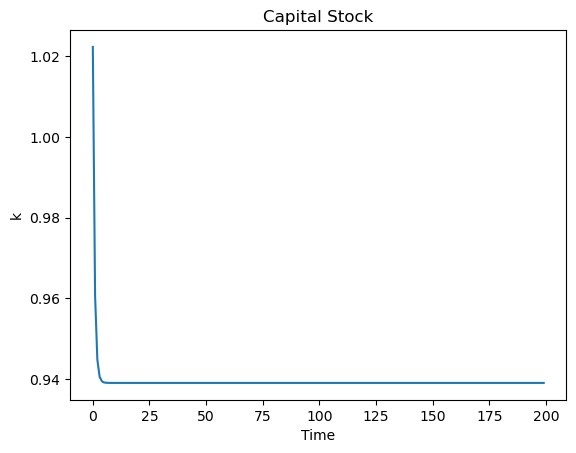

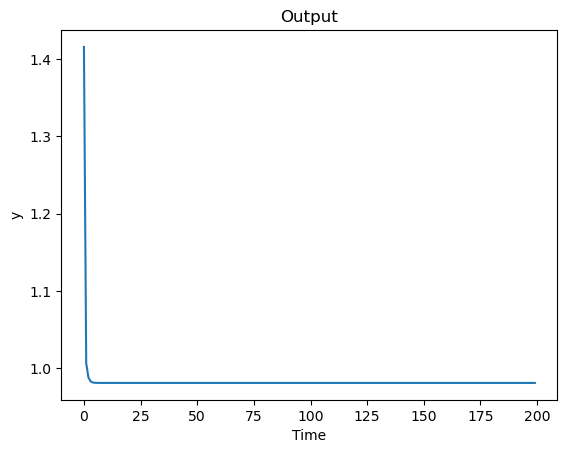

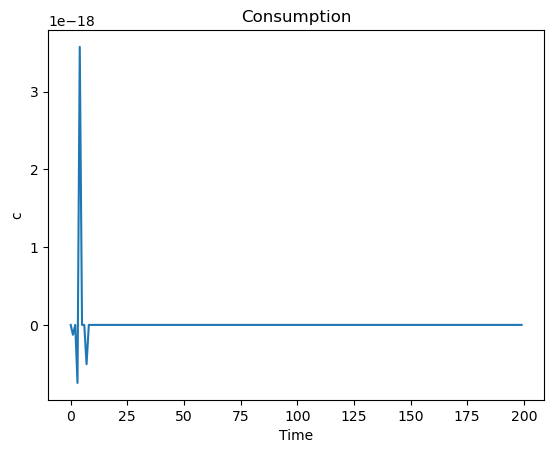

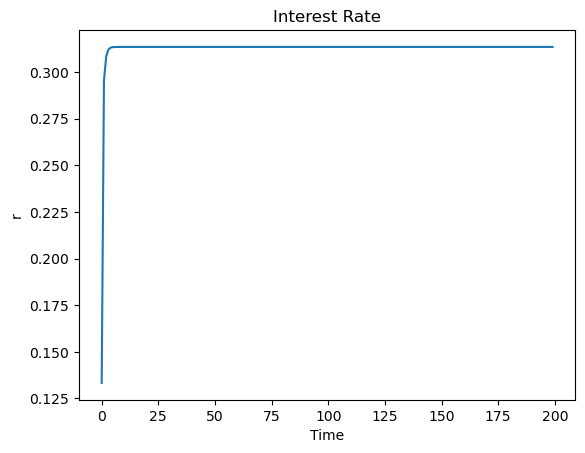

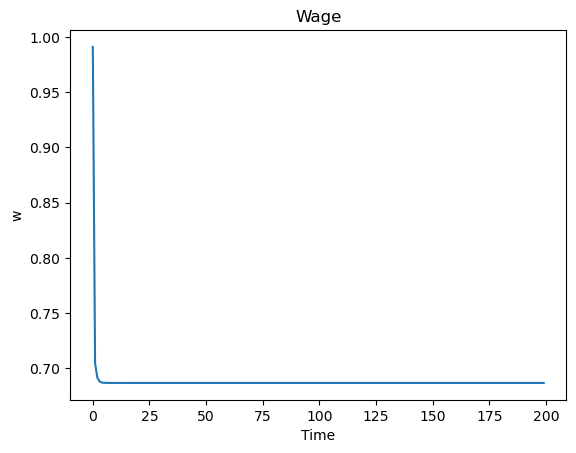

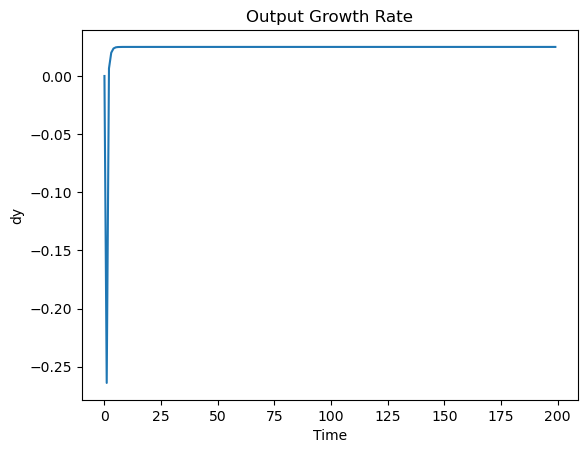

                          k             c         r         w         y           dy
-----------------  --------  ------------  --------  --------  --------  -----------
Initial value      3.18506    4.23571e-27  0.133333  0.990908  1.41558    0
Output value 1     1.02226   -1.27281e-19  0.295413  0.704638  1.00663   -0.263897
Output value 2     0.960624  -6.66947e-26  0.308556  0.691614  0.988021   0.00651781
Equilibrium value  3.18506    1.27226      0.133333  0.990908  1.41558    0.467541


In [3]:
from tabulate import tabulate

# Define the G shock
G_shock = {
    0: np.ones(1) * 0.25  # Increase G by 25% for 1 year
}

# Run the model simulation with the G shock
k, c, r, w, y, dy, k_eq, c_eq, r_eq, w_eq, y_eq, dy_eq = ramsey_model_simulation(G_shock=G_shock)

# The results will be plotted automatically

# Create a table with the results
table_data = [
    ["Initial value", k[0], c[0], r[0], w[0], y[0], dy[0]],
    ["Output value 1", k[1], c[1], r[1], w[1], y[1], dy[1]],
    ["Output value 2", k[2], c[2], r[2], w[2], y[2], dy[2]],
    ["Equilibrium value", k_eq, c_eq, r_eq, w_eq, y_eq, dy_eq]
]

# Print the table
print(tabulate(table_data, headers=["", "k", "c", "r", "w", "y", "dy"]))


We see that the shock has a direct effect on all sizes, though the effects vary between sizes. We want to state that according to economic theory the shock should lead to some changes in the first periods but the variables should then return to their initial/equilibrium value. However there seems to be some missconception between the graphs and table. We will analyze according to our results, both the graphs and the table, with notice that somethings could be improved. 


We see that according to our table that all sizes, excluding the consumption and the economic growth ,return to their long term steady state over time. We see that with the shock happening all at period one all variables experience some cuts. However the graphs show a different story. They show that the capital stock decreases just under 1\% and reaches a new steady state. Same story can be said about output and wages - they all decrease around 1\% and find a new steady state. However, according to the graphs, interest rates spike up, but both consumption and economic growth decrease before they rise again. Output growth then reaches a higher steady state than before but consumption adjusts and takes the same original value as before the shock some periods in. 


Our table shows that capital stock, interest rates, wages and output all decrease over the first periods but then adjust and reach their equilibrium value, which is the same as before the shock. However, economic growth first reaches a low point before spiking up and reaches a new equilibrium level which is higher than the initial value, which is the same as the graphs show. 


According to economic theory the shock should effect all sizes but how it effects them should vary between sizes. As well all sizes should reach their initial value as their equilibrium value after some periods, when the economy has adjusted to the shock. When public consumption is increased surprisingly, we should assume that private consumption decreases by less than the tax increase, as households can take loans to reduce the impact of the tax increase. This should lead to lower savings and capital stock, higher interest rates and increased marginal production of capital. When capital stock decreases the marginal production and wages should decrease in contrast, along with less total outout level and less economic growth. 


Some variables seem to be correct in the table according to our analyzis on how the effect should be illustrated, but some issues seem to occur with the graphs (and some variables in the table).


We note that some errors may be occurring with the code where the inconcistency with the table and graphs are showing. This will be looked into given the feedback we hopefully recieve that could help us see where the issue lies. 

Next we wanted to see the effects if the increased public consumption (increased tax) was distributed over 5 year period. We note that the same inconsistencies can be seen in this analyzis as well.

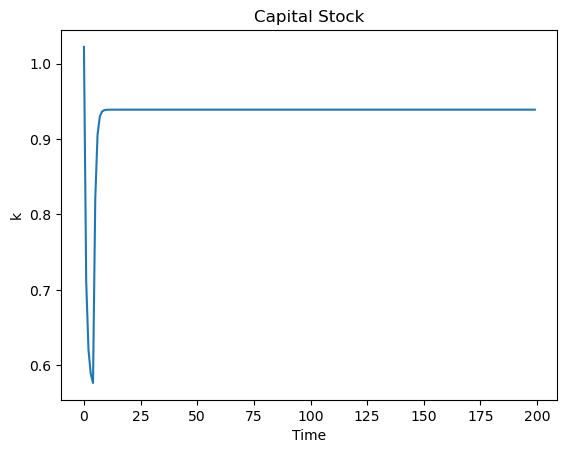

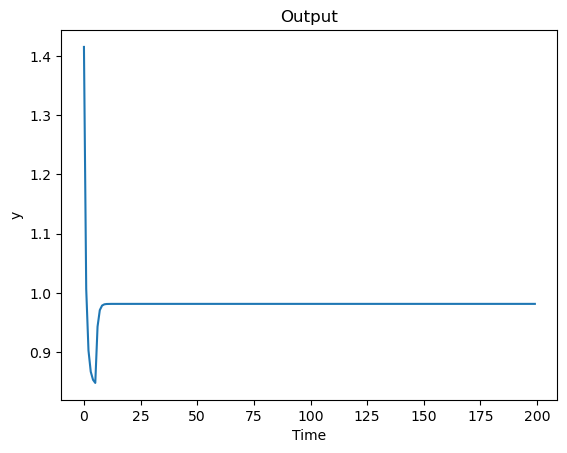

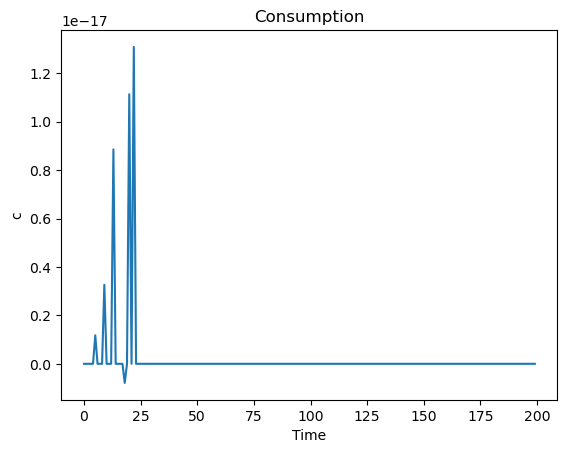

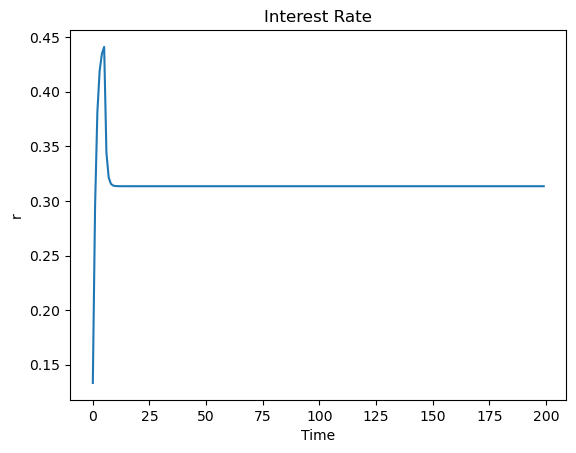

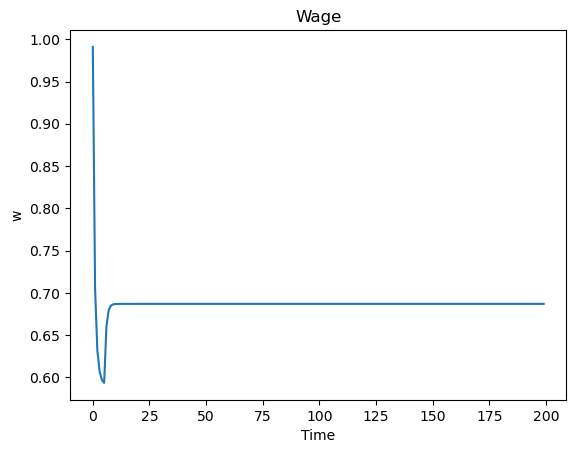

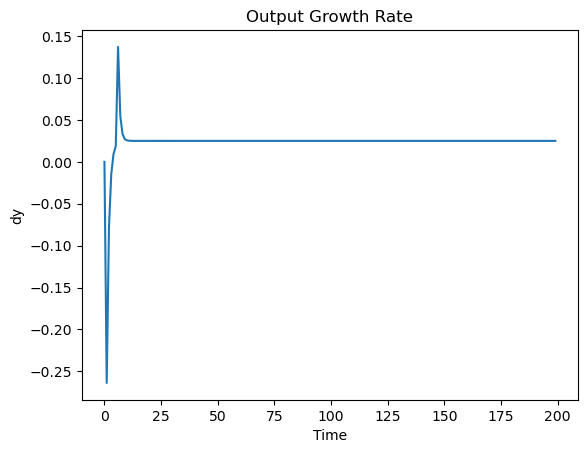

                          k            c         r         w         y          dy
-----------------  --------  -----------  --------  --------  --------  ----------
Initial value      3.18506   4.23571e-27  0.133333  0.990908  1.41558    0
Output value 1     1.02226   6.37661e-30  0.295413  0.704638  1.00663   -0.263897
Output value 2     0.710624  7.27696e-28  0.381043  0.631815  0.902593  -0.0783476
Equilibrium value  3.18506   1.27226      0.133333  0.990908  1.41558    0.467541


In [4]:
from tabulate import tabulate

# Define the G shock
G_shock = {
    0: np.ones(5) * 0.25  # Increase G by 25% for 5 year
}

# Run the model simulation with the G shock
k, c, r, w, y, dy, k_eq, c_eq, r_eq, w_eq, y_eq, dy_eq = ramsey_model_simulation(G_shock=G_shock)

# The results will be plotted automatically

# Create a table with the results
table_data = [
    ["Initial value", k[0], c[0], r[0], w[0], y[0], dy[0]],
    ["Output value 1", k[1], c[1], r[1], w[1], y[1], dy[1]],
    ["Output value 2", k[2], c[2], r[2], w[2], y[2], dy[2]],
    ["Equilibrium value", k_eq, c_eq, r_eq, w_eq, y_eq, dy_eq]
]

# Print the table
print(tabulate(table_data, headers=["", "k", "c", "r", "w", "y", "dy"]))


The table here shows the same values as above, so we assume the issue lies somewhere in the code for our table prints. 
However, most of the variables match with the economic theory that they should eventionally reach their initial steady state as their equilibrium value. 

Our graphs show a different story compared to the results above, when the shock hit all at once in period 1. The capital stock takes a deep dive in the first period before increasing again and reaches a new steady state, little below its initual value. A similar story can be said about both wages and output, however the equilibrium value for the output level and wages is significantly lower compared to before. Interest rates spike up before they decrease a small amount and reach their new steady state. The output growth rate falls 25\% in the first period and then spikes again to reach a new outlay value and then decreases again until it reaches a new steady state. The most inconsistencies can be seen in the consumption levels. They seem to be unconsistant until they reach period 25, in a simulation for 200 periods. They increase and fall until they fall under the initual value after some time and before it reaches their initual value as a equilibrium. 


According to economic theory, We should assume that individuals are rational and can dispose their consumption for the next increase in taxes. The most shock in private consumption should happen over the first period, but after that individuals and households should be able to dispose their consumption according to the fact they can assume the tax will increase over the next few years. As capital stock, wages and output all should decrease until they reach their output value and should then reach their initial value as their equilibrium steady state. 


# Discussion

Our next steps would would be to see how the changes in our parameters would effect the changes in our shock and model. As we faced some problems with the results we got we did not go further with seeing how other effects could be implyed in our model. However, we note that after we reached these inconclusive results, that maybe it would be simpler to only see how our parameters could affect the steady state and equilibrium values instead of using shocks. We take that under consideration for the fixation before the exam. However all feedback is well appriciated and to get imput from others what could be the best solution to the problems we are facing. 

# Conclusion

We made a simulation of the Ramsey model where we gave us some assumtion of the economy we were looking at. We then implyed a public consumtion shocks that amounts to 50\% of the GDP and wanted to see how it would effect our key variables in our economy - both when the shock hits all at once on period one and if the shock was scattered over five years. Our results are mostly inconsistant and we have stated above both how we assumed the results should be and then analyzed our results as well. For further work, we will take all feedback into our toolbox and try to make the project better and more efficient. 